In [1]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv("C:/Users/gayu4/OneDrive/Desktop/Carpred/car data.csv")

In [38]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [40]:
data.shape

(301, 9)

In [41]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [55]:
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())
print(data['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [43]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [44]:
df = data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [45]:
df['Current_Year']=2023

In [46]:
df['CarAge'] = df['Current_Year']-df['Year']

In [47]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,CarAge
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [51]:
df.drop(['Year','Current_Year'], axis = 1, inplace = True)

In [52]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'CarAge'],
      dtype='object')

In [53]:
df = pd.get_dummies(df, drop_first = True)

In [56]:
df.head() 

,Selling_Price,Present_Price,Kms_Driven,Owner,CarAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


NOTE:- Fuel Type --> Diesel,Petrol,CNG After 1 Hot Encoding only Diesel,Petrol are there because if Diesel = 0 and Petrol = 0 that means the car is CNG

2) Transmission --> Manual,Auto After 1HE only Manual. SO if Manual=0 that mean the car is AUto
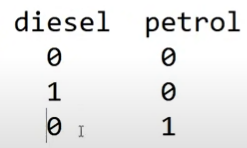

In [62]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

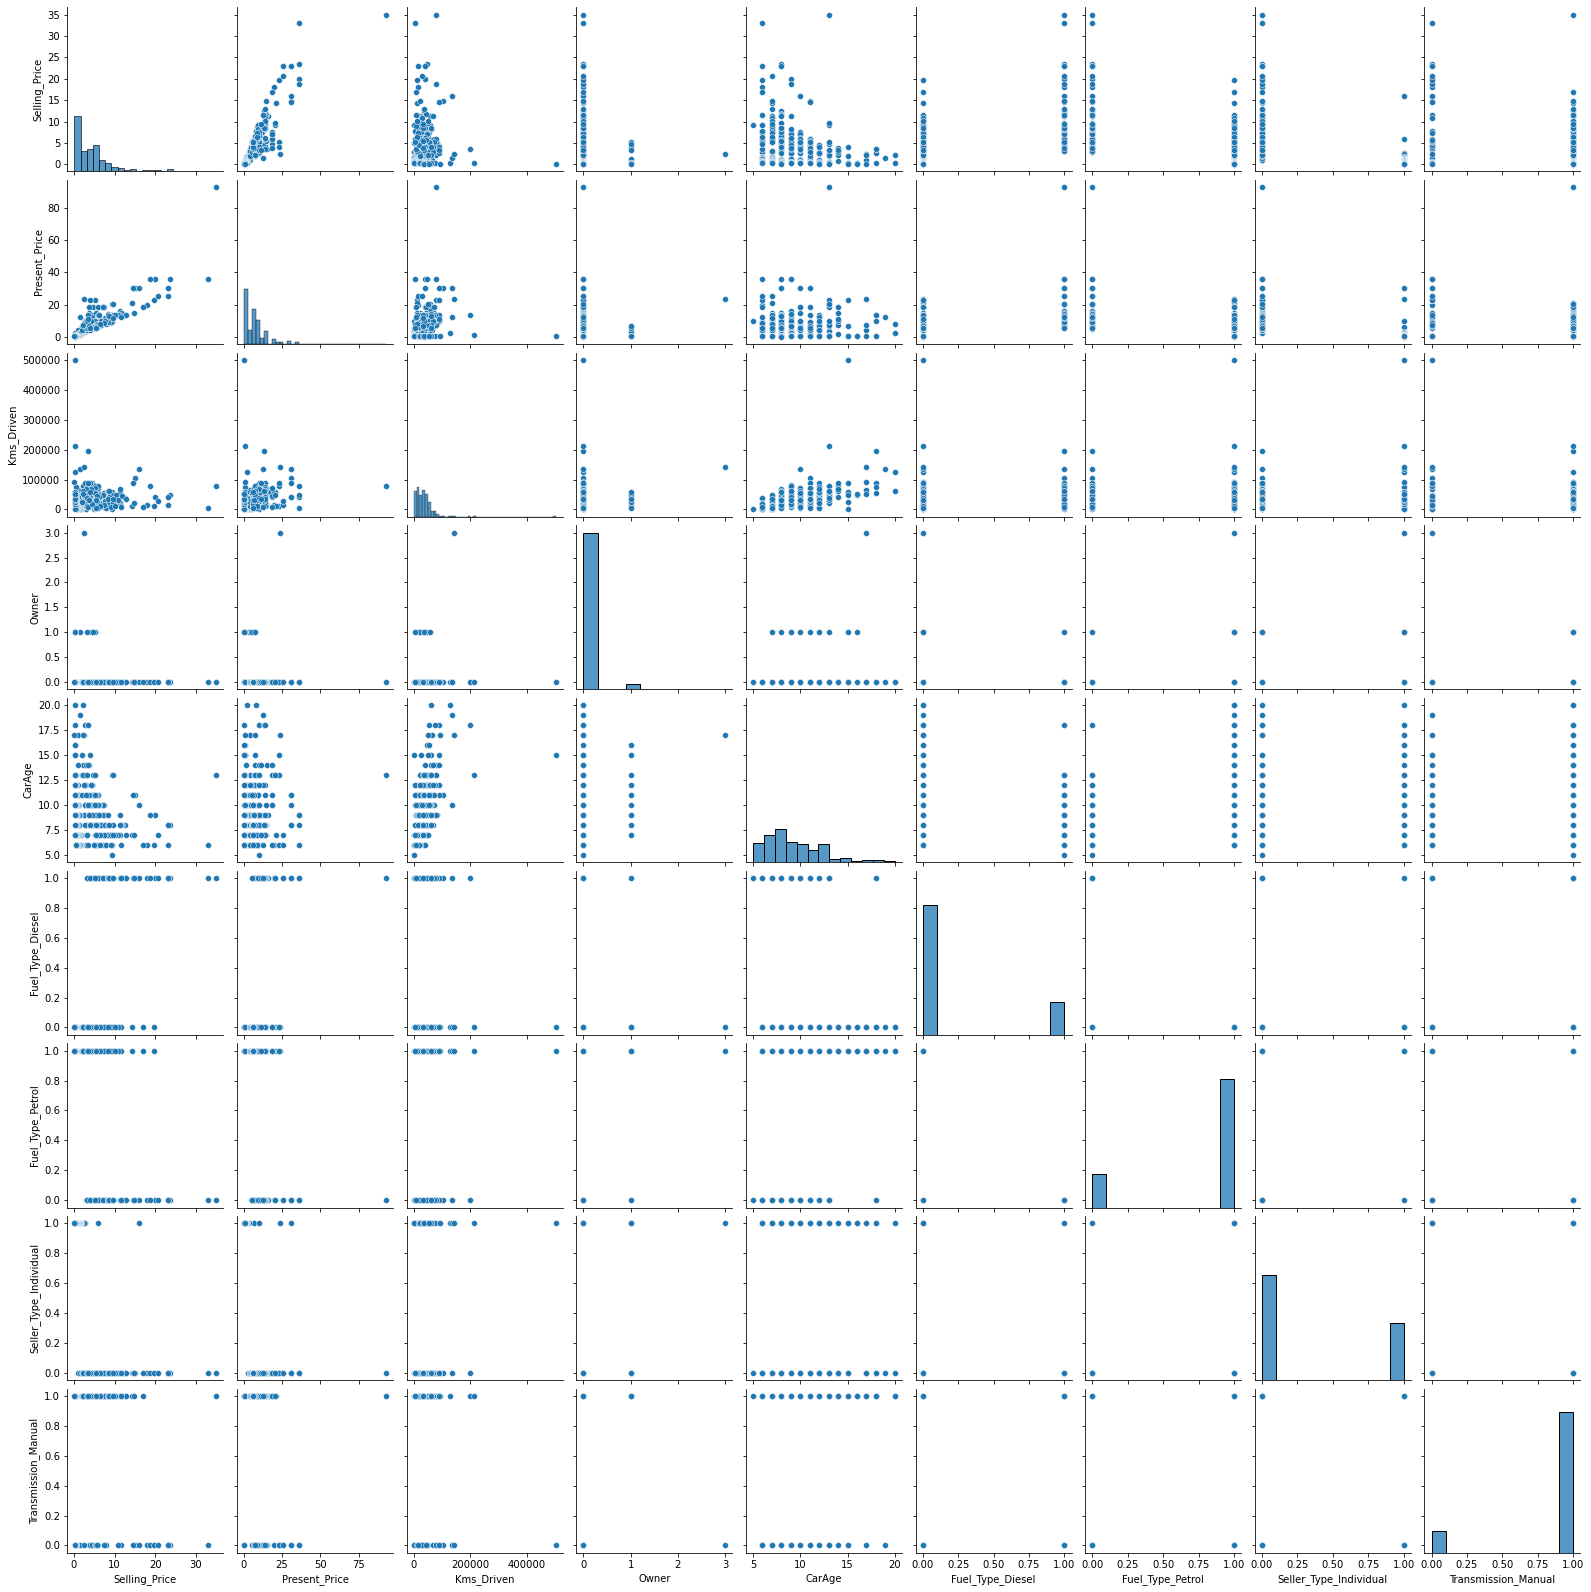

In [58]:
sns.pairplot(df)

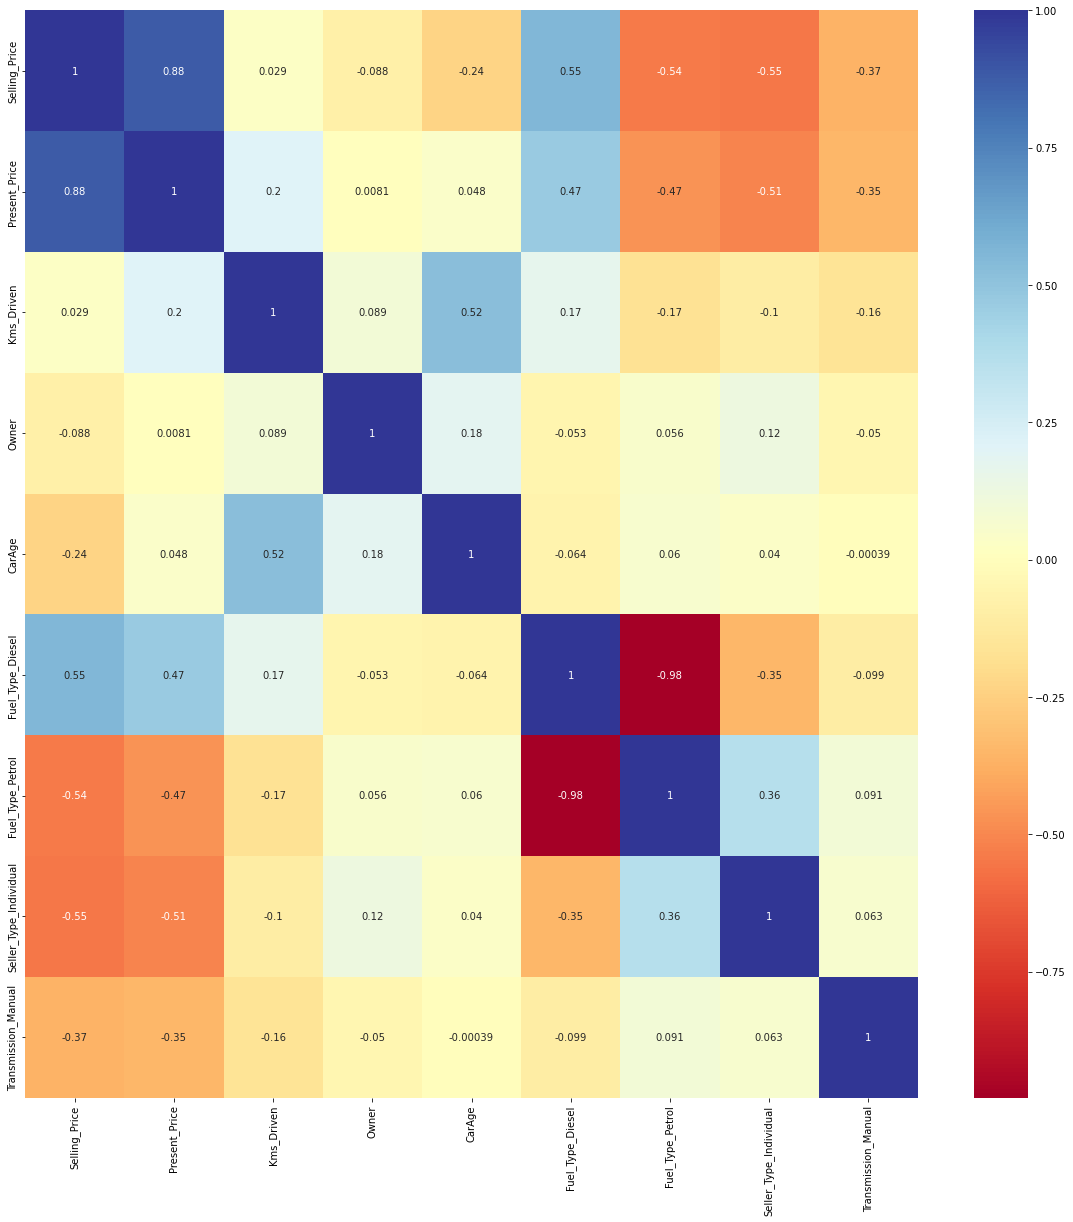

In [65]:
corrmat = df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlBu')

Dependent = Selling price 


In [66]:
x=df.iloc[:,1:] #Independent Feature
y = df.iloc[:,0] #Dependent Feature-->Selling Prirce 

In [67]:
x.head()

,Present_Price,Kms_Driven,Owner,CarAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [68]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [71]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [73]:
print(model.feature_importances_) #1st 0.4-->Present Price 3rd 0.0007 -->Owmer

[0.40773672 0.04067541 0.00073546 0.07632943 0.21196799 0.01206336
 0.12266867 0.12782297]


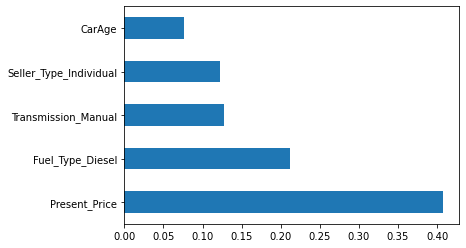

In [76]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind ='barh') #TOP 5 IMPT features
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [80]:
x_train.shape

(240, 8)

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [90]:
#Randomized search CV

#No of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#No of features to consider at every split
max_features = ['auto', 'sqrt']

#Max no levels in tree
max_depth=[int(x) for x  in np.linspace(5 , 30, num = 6)]
#max_dept.append(None)
#Mini No of samples required to split a node
min_samples_split = [2,5,10,15,100]

#min no of samples required for each node
min_samples_leaf = [1,2,5,10]

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
#create the random grid
random_grid = {'n_estimators' : n_estimators,
                'max_features':max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [93]:
rf=RandomForestRegressor()

In [97]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter =10, cv=5,verbose =2,random_state = 42, n_jobs= 1)

In [99]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [100]:
predictions= rf_random.predict(x_test)

In [101]:
predictions

array([ 2.79934306,  0.24642913, 13.9034544 ,  3.29245761,  2.97640893,
        6.82895727,  2.84602881,  4.98670579,  0.26547568,  0.34670463,
        4.61855304,  4.222299  , 14.19784619,  3.3202475 ,  5.10488273,
        0.24661977,  5.00019149,  4.84187573, 10.16798266,  5.11759393,
        6.35156179,  5.28553951, 17.94824819, 10.23342114,  1.13846126,
        2.81812427,  0.61103645,  0.60291392,  4.34749839,  0.88060146,
       20.80074753,  7.59458831,  5.34622926,  0.41208089,  5.76020641,
        7.99151594,  0.42523785,  0.55383709,  4.71656762,  6.47500616,
        0.26211729,  5.28898267,  7.71336322,  7.43872193,  0.35389688,
        0.61134949,  0.7175337 , 10.9530692 ,  1.94359685,  4.47923321,
        0.42523785, 20.19653611,  3.38557354,  5.34801077, 20.7878365 ,
        4.3778622 ,  4.87414611,  1.15638112,  1.15639439,  2.93957123,
        4.87554355])

C:\Users\gayu4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

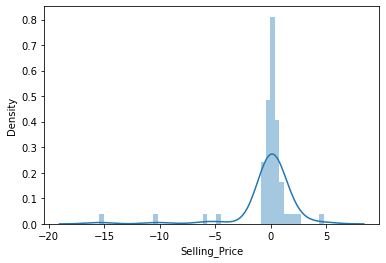

In [102]:
sns.distplot(y_test-predictions)

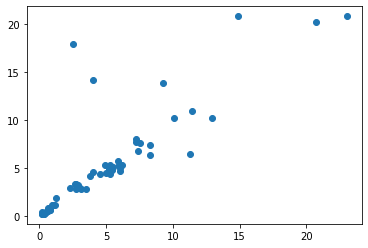

In [103]:
plt.scatter(y_test,predictions)

In [104]:
import pickle
file = open('Random_forest_regresison_model.pkl','wb')

pickle.dump(rf_random, file)